# Churn

### data pre-processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
subscribers = pd.read_csv('subscribers.csv', parse_dates = ['account_creation_date', 'trial_end_date','last_payment','next_payment','cancel_date'])
#subscribers

In [5]:
subscribers1 = subscribers[-((subscribers['cancel_date'].isnull()==False)&(subscribers['payment_period']==1)&(subscribers['trial_completed']==False))]
subscribers1



,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:00,2020-06-07 21:44:00,NaT,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:00,2020-07-15 15:44:00,NaT,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaT,NaT,NaT,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaT,NaT,NaT,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:00,2020-06-19 12:57:00,NaT,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:00,2020-04-01 14:12:00,NaT,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:00,2020-04-20 18:02:00,NaT,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:00,2020-05-04 19:40:00,NaT,True
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:00,2020-05-31 23:58:00,NaT,True


In [ ]:
movies_df[(movies_df['director'] == 'Christopher Nolan') | 
          (movies_df['director'] == 'Ridley Scott')].head()



In [14]:
Churn1 = subscribers1[(subscribers1['payment_period'] == 0) & (subscribers1['cancel_date'].isnull()== True) & (subscribers1['account_creation_date'] < '20200313')]
Churn1                      
                      
                      

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaT,NaT,NaT,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaT,NaT,NaT,True
12,277565,25393847,base,2.0,regional,supplement OTT,28.751405,2.0,57.0,False,...,0.0367,ar,NaN,14,False,0,NaT,NaT,NaT,True
13,377093,23163827,economy,3.0,comedy,replace OTT,33.101274,2.0,54.0,False,...,0.0367,ar,NaN,14,False,0,NaT,NaT,NaT,True
17,673104,21829221,enhanced,2.0,comedy,replace OTT,27.301448,2.0,24.0,False,...,0.0367,ar,NaN,14,False,0,NaT,NaT,NaT,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227609,39499,22532282,base,NaN,comedy,replace OTT,NaN,NaN,NaN,False,...,NaN,ar,Paypal,14,False,0,NaT,NaT,NaT,True
227610,110393,26263998,NaN,NaN,NaN,expand international access,-8.947459,NaN,43.0,False,...,0.0367,ar,Paypal,14,False,0,NaT,NaT,NaT,True
227613,553731,20172551,base,3.0,comedy,replace OTT,21.501623,2.0,45.0,False,...,0.0367,ar,NaN,14,False,0,NaT,NaT,NaT,True
227614,324200,24317364,enhanced,2.0,comedy,replace OTT,30.201361,2.0,52.0,False,...,0.0367,ar,NaN,14,False,0,NaT,NaT,NaT,True


In [16]:
Churn2 = subscribers1[(subscribers1['payment_period'] == 0) & (subscribers1['cancel_date'].isnull()== False) & (subscribers1['account_creation_date'] < '20200313')]
Churn2                     
                      
  

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
9,681969,23452753,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,False,...,0.3303,ar,NaN,14,False,0,NaT,NaT,2020-01-27,False
14,546210,26308559,NaN,NaN,NaN,expand international access,30.201361,NaN,48.0,False,...,0.0367,ar,NaN,14,False,0,NaT,NaT,2019-07-16,False
22,386250,28863903,base,2.0,drama,replace OTT,21.501623,2.0,50.0,False,...,0.3303,ar,NaN,14,False,0,NaT,NaT,2020-03-12,False
23,7506,29576692,NaN,3.0,NaN,expand international access,34.551230,2.0,31.0,False,...,0.0367,ar,Standard Charter,14,False,0,NaT,NaT,2019-07-21,False
28,179332,21447938,base,3.0,drama,replace OTT,30.201361,2.0,59.0,False,...,0.3303,ar,RAKBANK,14,False,0,NaT,NaT,2019-12-31,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227603,61453,26067054,base,3.0,drama,replace OTT,27.301448,2.0,55.0,False,...,0.0367,ar,Standard Charter,14,False,0,NaT,NaT,2020-01-17,False
227611,33596,26891485,enhanced,NaN,comedy,replace OTT,NaN,NaN,NaN,False,...,NaN,ar,Paypal,14,False,0,NaT,NaT,2019-09-09,False
227617,136817,28920930,enhanced,NaN,regional,replace OTT,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,False,0,NaT,NaT,2019-09-23,False
227618,303902,22218943,economy,NaN,comedy,replace OTT,37.451142,NaN,67.0,True,...,0.0367,ar,NaN,14,False,0,NaT,NaT,2019-11-27,False


In [20]:
Churn3 = pd.concat([Churn1, Churn2],join='outer')

#Churn3

In [19]:
#Churn3.drop_duplicates()

In [22]:
Churn3['churn'] = 1

In [23]:
Churn3

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,ar,NaN,14,False,0,NaT,NaT,NaT,True,1
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,ar,NaN,14,False,0,NaT,NaT,NaT,True,1
12,277565,25393847,base,2.0,regional,supplement OTT,28.751405,2.0,57.0,False,...,ar,NaN,14,False,0,NaT,NaT,NaT,True,1
13,377093,23163827,economy,3.0,comedy,replace OTT,33.101274,2.0,54.0,False,...,ar,NaN,14,False,0,NaT,NaT,NaT,True,1
17,673104,21829221,enhanced,2.0,comedy,replace OTT,27.301448,2.0,24.0,False,...,ar,NaN,14,False,0,NaT,NaT,NaT,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227603,61453,26067054,base,3.0,drama,replace OTT,27.301448,2.0,55.0,False,...,ar,Standard Charter,14,False,0,NaT,NaT,2020-01-17,False,1
227611,33596,26891485,enhanced,NaN,comedy,replace OTT,NaN,NaN,NaN,False,...,ar,Paypal,14,False,0,NaT,NaT,2019-09-09,False,1
227617,136817,28920930,enhanced,NaN,regional,replace OTT,NaN,NaN,NaN,False,...,ar,Standard Charter,14,False,0,NaT,NaT,2019-09-23,False,1
227618,303902,22218943,economy,NaN,comedy,replace OTT,37.451142,NaN,67.0,True,...,ar,NaN,14,False,0,NaT,NaT,2019-11-27,False,1


In [26]:
NotChurn1 = subscribers1[(subscribers1['payment_period'] > 0) & (subscribers1['cancel_date'].isnull()== True)]
#NotChurn1                     
               

In [28]:
NotChurn2 = subscribers1[(subscribers1['payment_period'] > 0) & (subscribers1['cancel_date'].isnull()== False) & (subscribers1['last_payment'].isnull()== False)]
#NotChurn2                     
          

In [29]:
NotChurn3 = pd.concat([NotChurn1, NotChurn2],join='outer')
NotChurn3.drop_duplicates()
NotChurn3

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:00,2020-06-07 21:44:00,NaT,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:00,2020-07-15 15:44:00,NaT,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:00,2020-06-19 12:57:00,NaT,True
5,284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,...,0.3303,ar,RAKBANK,14,True,1,2020-03-17 20:15:00,2020-07-17 20:15:00,NaT,True
6,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,...,0.3303,ar,Standard Charter,14,True,1,2020-03-04 18:30:00,2020-07-04 18:30:00,NaT,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227441,614526,20500923,base,3.0,comedy,access to exclusive content,30.201361,2.0,43.0,False,...,0.0000,ar,NaN,14,False,1,2019-10-12 03:21:00,NaT,2020-01-02,True
227450,526010,23280931,base,3.0,comedy,supplement OTT,30.201361,2.0,48.0,False,...,0.0367,ar,NaN,14,False,1,2019-10-20 03:22:00,NaT,2020-02-14,True
227472,502071,20091322,base,2.0,comedy,supplement OTT,18.601711,2.0,40.0,False,...,0.0367,ar,NaN,14,False,1,2019-08-25 22:45:00,NaT,2019-09-03,True
227521,390065,26287727,enhanced,3.0,drama,replace OTT,22.951579,2.0,32.0,False,...,0.0367,ar,NaN,14,False,1,2019-11-03 01:53:00,NaT,2020-01-12,True


In [30]:
NotChurn3['churn'] = 0

In [31]:
NotChurn3

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,ar,Standard Charter,14,True,1,2020-02-07 21:44:00,2020-06-07 21:44:00,NaT,True,0
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,ar,NaN,14,True,1,2020-03-15 15:44:00,2020-07-15 15:44:00,NaT,True,0
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,ar,NaN,14,True,2,2020-02-19 12:57:00,2020-06-19 12:57:00,NaT,True,0
5,284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,...,ar,RAKBANK,14,True,1,2020-03-17 20:15:00,2020-07-17 20:15:00,NaT,True,0
6,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,...,ar,Standard Charter,14,True,1,2020-03-04 18:30:00,2020-07-04 18:30:00,NaT,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227441,614526,20500923,base,3.0,comedy,access to exclusive content,30.201361,2.0,43.0,False,...,ar,NaN,14,False,1,2019-10-12 03:21:00,NaT,2020-01-02,True,0
227450,526010,23280931,base,3.0,comedy,supplement OTT,30.201361,2.0,48.0,False,...,ar,NaN,14,False,1,2019-10-20 03:22:00,NaT,2020-02-14,True,0
227472,502071,20091322,base,2.0,comedy,supplement OTT,18.601711,2.0,40.0,False,...,ar,NaN,14,False,1,2019-08-25 22:45:00,NaT,2019-09-03,True,0
227521,390065,26287727,enhanced,3.0,drama,replace OTT,22.951579,2.0,32.0,False,...,ar,NaN,14,False,1,2019-11-03 01:53:00,NaT,2020-01-12,True,0


In [33]:
ChurnData = pd.concat([Churn3, NotChurn3],join='outer')
ChurnData
#ChurnData.to_csv("ChurnData.csv")

In [37]:
ChurnData['join_fee'].value_counts()

 0.0367    107832
 0.0000     31826
 0.3303     21637
 0.6606     11915
 0.1101      9879
 0.3670      1140
 0.1835       146
-0.0367         9
 0.6973         8
 0.6239         6
 0.1468         2
 0.2936         2
 0.0734         2
-0.6606         2
 0.4037         1
-0.3303         1
 0.2569         1
 0.5872         1
-0.1101         1
 0.7340         1
Name: join_fee, dtype: int64

In [42]:
ChurnData1 = ChurnData[['subid','initial_credit_card_declined','join_fee','churn']]
ChurnData1.isnull().sum()

subid                               0
initial_credit_card_declined        0
join_fee                        33604
churn                               0
dtype: int64

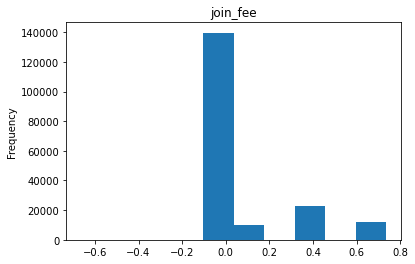

In [43]:
ChurnData1['join_fee'].plot(kind='hist', title='join_fee')


In [44]:
ChurnData1['join_fee'].mode()

0    0.0367
dtype: float64

In [45]:
ChurnData1['join_fee'].mean()

0.11126321877116431

In [46]:
ChurnData1['join_fee']=ChurnData1['join_fee'].fillna(0.0367)


<ipython-input-46-6a6e2e84a609>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChurnData1['join_fee']=ChurnData1['join_fee'].fillna(0.0367)


In [47]:
ChurnData2 = ChurnData1.dropna()

In [48]:
ChurnData2

,subid,initial_credit_card_declined,join_fee,churn
2,26844789,False,0.1101,1
3,29417030,False,0.0367,1
12,25393847,False,0.0367,1
13,23163827,False,0.0367,1
17,21829221,False,0.0367,1
...,...,...,...,...
227441,20500923,False,0.0000,0
227450,23280931,False,0.0367,0
227472,20091322,False,0.0367,0
227521,26287727,False,0.0367,0


In [49]:
dummy_fields = ['initial_credit_card_declined']

for each in dummy_fields:
    dummies = pd.get_dummies( ChurnData2.loc[:, each], prefix=each ) 
    ChurnData2 = pd.concat( [ChurnData2, dummies], axis = 1 )
    
    
fields_to_drop = ['initial_credit_card_declined']
ChurnData3 = ChurnData2.drop( fields_to_drop, axis = 1 )
ChurnData3.head()
    

,subid,join_fee,churn,initial_credit_card_declined_False,initial_credit_card_declined_True
2,26844789,0.1101,1,1,0
3,29417030,0.0367,1,1,0
12,25393847,0.0367,1,1,0
13,23163827,0.0367,1,1,0
17,21829221,0.0367,1,1,0


In [52]:
fields_to_drop = ['initial_credit_card_declined_True']
ChurnData4 = ChurnData3.drop( fields_to_drop, axis = 1 )
ChurnData4.head()

,subid,join_fee,churn,initial_credit_card_declined_False
2,26844789,0.1101,1,1
3,29417030,0.0367,1,1
12,25393847,0.0367,1,1
13,23163827,0.0367,1,1
17,21829221,0.0367,1,1


In [57]:
CustomerS1 = pd.read_csv('CustomerS1.csv')
CustomerS1.shape

(144383, 51)

In [54]:
ChurnData5 = pd.merge(ChurnData4, CustomerS1, on='subid', how='left')

In [55]:
ChurnData5.isnull().sum()

subid                                                0
join_fee                                             0
churn                                                0
initial_credit_card_declined_False                   0
Unnamed: 0                                       80678
num_weekly_services_utilized                     80678
weekly_consumption_hour                          80678
num_ideal_streaming_services                     80678
age                                              80678
package_type_base                                80678
package_type_economy                             80678
preferred_genre_comedy                           80678
preferred_genre_drama                            80678
preferred_genre_international                    80678
preferred_genre_other                            80678
intended_use_access to exclusive content         80678
intended_use_education                           80678
intended_use_expand international access         80678
intended_u

In [56]:
ChurnData6 = ChurnData5.dropna()
ChurnData6.shape

(137338, 54)

In [58]:
#ChurnData6.to_csv("ChurnData6.csv")

In [59]:
ChurnData6['churn'].value_counts()

0    91698
1    45640
Name: churn, dtype: int64